# Project. Financial Analysis on Twitter

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Description

In [ ]:
full_name = 'Hadi Hadavi'
student_id = '99100263'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/data/'
os.chdir(folder_path)

Mounted at /content/drive


## 1 Exploratory Data Analysis

In [5]:
# Loading Datasets

# Read "companies.csv" into a DataFrame
companies_df = pd.read_csv('./companies.csv')

# Read "entities.csv" into a DataFrame
entities_df = pd.read_csv('./entities.csv')

# Read "training.1600000.processed.noemoticon.csv" into a DataFrame
training_df = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1")

# Read "tweets.csv" into a DataFrame
tweets_df = pd.read_csv('./tweets.csv')

# Read "users.csv" into a DataFrame, skipping lines with different numbers of fields
users_df = pd.read_csv('./users.csv', on_bad_lines='skip')

# Previewing
print("Companies: \n",companies_df.head())
print("Entities: \n",entities_df.head())
print("Trainings: \n",training_df.head())
print("Tweets: \n",tweets_df.head())

<ipython-input-5-a1a5d4743153>:16: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv('./users.csv', on_bad_lines='skip')


Companies: 
   ticker                  name exchange  capitalization
0      A  Agilent Technologies     NYSE    1.915000e+10
1     AA            Alcoa Corp     NYSE    6.480000e+09
2   AAAG  AAA Century Group US  OTCMKTS    9.480000e+06
3  AAAIF  ALTERNATIVE INV TR N  OTCMKTS    7.840000e+06
4  AAALF    AAREAL BANK AG NPV  OTCMKTS    1.720000e+09
Entities: 
              tweet_id entity_type  \
0  865191269030612992         url   
1  865191269030612992      symbol   
2  865191271899570176         url   
3  865191271899570176     hashtag   
4  865191271899570176     hashtag   

                                                text  
0  http://ih.advfn.com/p.php?pid=nmona&article=74...  
1                                               AMGN  
2  https://finance.yahoo.com/news/amgen-submits-b...  
3                                                FDA  
4                                            biotech  
Trainings: 
    0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_ 

In [ ]:
print("Tweets: \n",tweets_df.head())
print("Users: \n",users_df.head())

Tweets: 
                    id                                               text  \
0  865326129644797957  RT @cruzfloresiv: To all the weak hands who so...   
1  865326133008642049  Investors Eye Fed, But Bond ETFs Still Add Ass...   
2  865326134262681600  Sell $NLNK (Ne❑wLink Genetics Corporation) tha...   
3  865326134917050368  Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...   
4  865326135952855040  Former #FDA commissioner Califf joins Verily, ...   

              user_id  in_reply_to_status_id  in_reply_to_user_id  \
0  859451814940336128                      0                    0   
1            44060322                      0                    0   
2  713570637306986496                      0                    0   
3  823239593151655936                      0                    0   
4            44367489                      0                    0   

   retweeted_status_id  retweeted_user_id lang  \
0   865323140531896320         3005609114   en   
1                 

### Overall statistics about the dataset

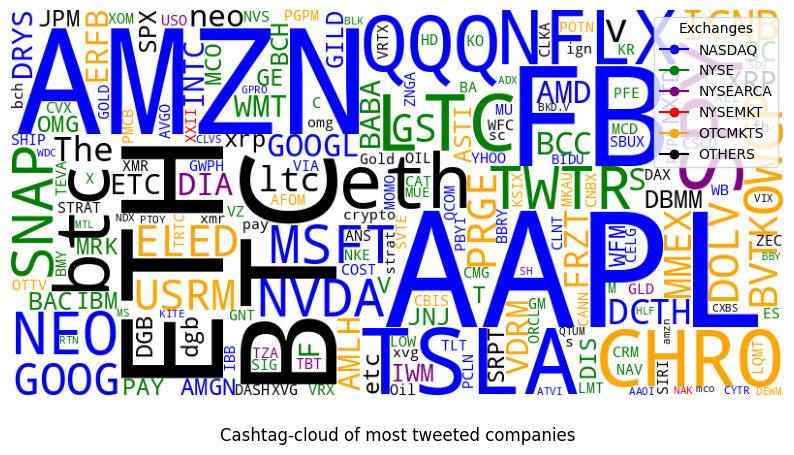

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Step 1: Read entities dataset and filter rows
filtered_entities_df = entities_df[entities_df['entity_type'] == 'symbol']

# Step 2: Create a dictionary from the filtered data
symbol_count_dict = filtered_entities_df['text'].value_counts().to_dict()

# Step 3: Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symbol_count_dict)

# Step 4: Read companies dataset
companies_df

# Step 5: Assign unique colors to exchanges
exchange_colors = {
    "NASDAQ": 'blue',
    "NYSE": 'green',
    "NYSEARCA": 'purple',
    "NYSEMKT": 'red',
    "OTCMKTS": 'orange',
    "OTHERS": 'black'  # Assign 'black' for "OTHERS" or missing values
}

# Step 6: Match symbols to companies and assign colors
def assign_color(ticker):
    exchange = companies_df.loc[companies_df['ticker'] == ticker, 'exchange'].values
    if len(exchange) > 0:
        exchange = exchange[0]
        return exchange_colors.get(exchange, exchange_colors["OTHERS"])
    return exchange_colors["OTHERS"]  # Assign 'black' for missing values

# Assign colors to symbols
symbol_colors = {symbol: assign_color(symbol) for symbol in symbol_count_dict.keys()}

# Step 7: Plot the word cloud with assigned colors
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud.recolor(color_func=lambda word, font_size, position, orientation, **kwargs: symbol_colors.get(word, 'red')))
plt.axis('off')

# Step 8: Create a color legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=exchange) for exchange, color in exchange_colors.items()]
plt.legend(handles=legend_elements, title='Exchanges', loc='upper right')

# Step 9: Add a title beneath the plot
plt.text(0.5, -0.1, "Cashtag-cloud of most tweeted companies", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

# Show the plot
plt.show()

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


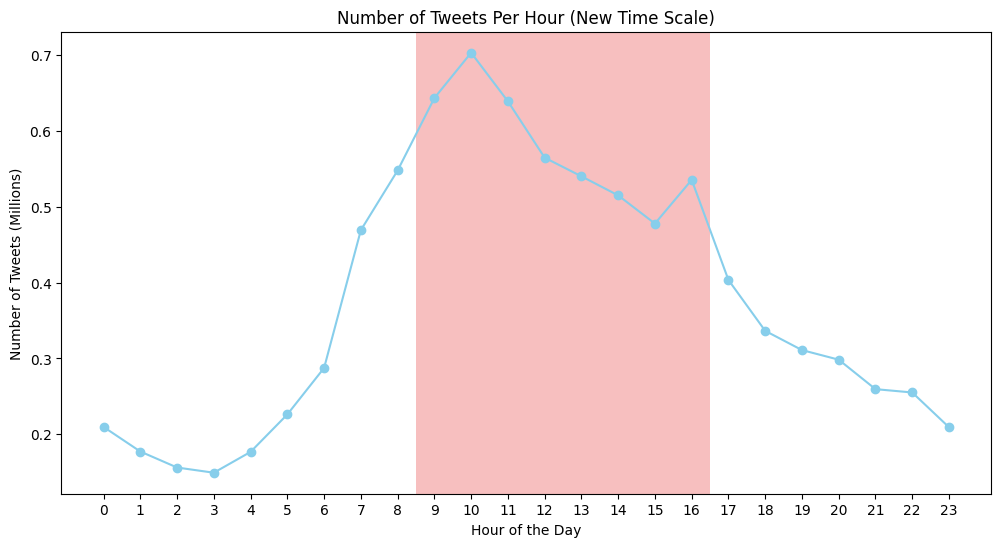

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from pytz import timezone

# Verify if GPU is available
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Step 1: Read the tweets dataset
tweets_df

# Step 2: Convert the "created_at" column to datetime with a specified format
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Step 3: Change the time zone to a new one (e.g., 'US/Central')
tweets_df['created_at'] = tweets_df['created_at'].dt.tz_convert('US/Central')

# Step 4: Adjust time
tweets_df['created_at_adjusted'] = (tweets_df['created_at'].dt.hour + 1) % 24

# Step 5: Create a plot of the number of tweets per hour
tweets_per_hour = tweets_df['created_at_adjusted'].value_counts().sort_index()

# Step 6: Identify peak hours and highlight the background (9 am to 16 pm)
peak_hours = tweets_per_hour.loc[9:16].idxmax()

plt.figure(figsize=(12, 6))

# Divide y-labels by 1 million
tweets_per_hour = tweets_per_hour / 1000000

# Plot the line chart
tweets_per_hour.plot(kind='line', marker='o', color='skyblue')

# Highlight background for the specified peak hours (9 am to 4 pm)
plt.axvspan(9 - 0.5, 16 + 0.5, facecolor='lightcoral', alpha=0.5)

plt.title('Number of Tweets Per Hour (New Time Scale)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets (Millions)')
plt.xticks(range(24))
plt.show()

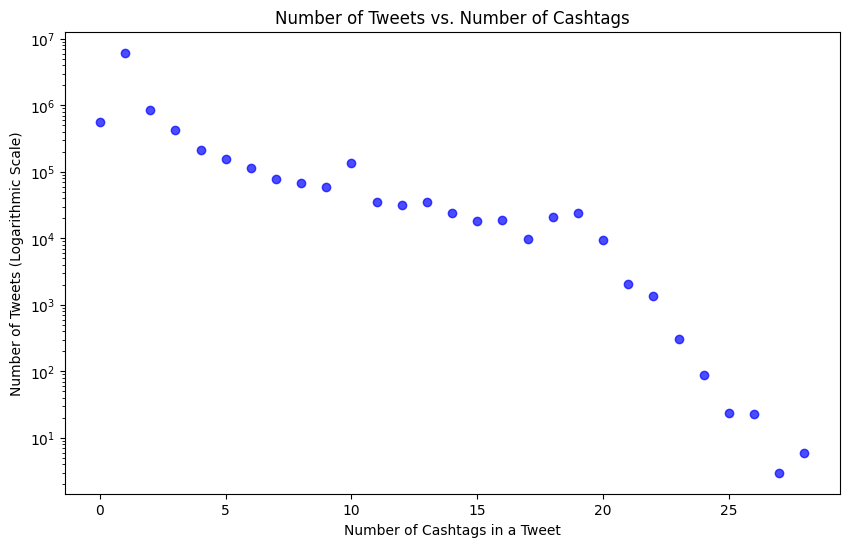

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the tweets dataset
tweets_df

# Extract cashtags from the "text" column
tweets_df['cashtags'] = tweets_df['text'].str.findall(r'\$[A-Z]+')

# Count the number of cashtags in each tweet
tweets_df['cashtag_count'] = tweets_df['cashtags'].apply(lambda x: len(x))

# Limit the cashtag count to a maximum of 30
tweets_df['cashtag_count'] = tweets_df['cashtag_count'].clip(upper=30)

# Count the number of tweets for each cashtag count
tweets_per_cashtag_count = tweets_df['cashtag_count'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Scatter plot with blue dots
plt.scatter(tweets_per_cashtag_count.index, tweets_per_cashtag_count.values, color='blue', alpha=0.7)

plt.title('Number of Tweets vs. Number of Cashtags')
plt.xlabel('Number of Cashtags in a Tweet')
plt.ylabel('Number of Tweets (Logarithmic Scale)')
plt.show()

In [ ]:
import pandas as pd
import json
import os
from tqdm import tqdm

# Assuming data_folder is the path to the folder containing the datasets
data_folder = './'

# Step 1: Read the datasets
entities_df
tweets_df

# Filter symbol entities
symbol_entities_df = entities_df[entities_df['entity_type'] == 'symbol']

# Step 2: Initialize variables
tweets_count_dict = {}

# Step 3: Iterate over symbol entities dataset and update the dictionary
last_tweet_index = 0
current_date = None
current_hour = None

for index, entity_row in tqdm(symbol_entities_df.iterrows(), total=len(symbol_entities_df), desc="Processing Entities"):
    cashtag = entity_row['text']
    tweet_id = entity_row['tweet_id']

    # Find the corresponding tweet in the tweets dataset
    while last_tweet_index < len(tweets_df) and tweets_df.at[last_tweet_index, 'id'] < tweet_id:
        current_date = pd.to_datetime(tweets_df.at[last_tweet_index, 'created_at'], format='%a %b %d %H:%M:%S %z %Y').date()
        current_hour = pd.to_datetime(tweets_df.at[last_tweet_index, 'created_at'], format='%a %b %d %H:%M:%S %z %Y').hour
        last_tweet_index += 1

    # Check if tweet_id matches
    if last_tweet_index < len(tweets_df) and tweets_df.at[last_tweet_index, 'id'] == tweet_id:
        # Update the dictionary dynamically
        if cashtag not in tweets_count_dict:
            tweets_count_dict[cashtag] = {}

        if current_date not in tweets_count_dict[cashtag]:
            tweets_count_dict[cashtag][current_date] = {}

        if current_hour not in tweets_count_dict[cashtag][current_date]:
            tweets_count_dict[cashtag][current_date][current_hour] = 0

        tweets_count_dict[cashtag][current_date][current_hour] += 1


In [7]:
import json
import os
import datetime

# Convert date objects to strings for JSON serialization
def convert_dates_to_str(d):
    if isinstance(d, datetime.date):
        return d.strftime('%Y-%m-%d')
    elif isinstance(d, dict):
        return {convert_dates_to_str(k): convert_dates_to_str(v) for k, v in d.items()}
    elif isinstance(d, (list, tuple)):
        return [convert_dates_to_str(item) for item in d]
    return d

# Convert date objects to strings in the dictionary
tweets_count_dict_str = convert_dates_to_str(tweets_count_dict)

# Save the dictionary to a file
save_path = os.path.join(data_folder, 'tweets_count_dict.json')
with open(save_path, 'w') as file:
    json.dump(tweets_count_dict_str, file)

In [6]:
import json
from datetime import datetime

# Load the dictionary from the file
file_path = './tweets_count_dict.json'  # Change this to the correct path
with open(file_path, 'r') as file:
    loaded_dict_str = json.load(file)

# Create a new dictionary with datetime keys
tweets_count_dict = {}

# Function to convert date and hour strings to datetime objects
def convert_to_datetime(date_str, hour_str):
    if date_str.lower() == 'null':
        return None  # Handle null value as needed
    if hour_str.lower() == 'null':
        hour_str = '00'  # Use a default hour if needed
    date_time_str = f"{date_str} {hour_str}"
    return datetime.strptime(date_time_str, "%Y-%m-%d %H")


for cashtag, date_dict in loaded_dict_str.items():
    # Convert cashtag to uppercase
    cashtag_upper = cashtag.upper()

    if cashtag_upper not in tweets_count_dict:
        tweets_count_dict[cashtag_upper] = {}

    for date_str, hour_dict in date_dict.items():
        date_time = convert_to_datetime(date_str, "00")  # Use a default hour if needed
        if date_time is not None:
            if date_time not in tweets_count_dict[cashtag_upper]:
                tweets_count_dict[cashtag_upper][date_time] = {}
            for hour_str, count in hour_dict.items():
                hour_time = datetime.strptime(hour_str, "%H")
                if hour_time.hour not in tweets_count_dict[cashtag_upper][date_time]:
                    tweets_count_dict[cashtag_upper][date_time][hour_time.hour] = count
                else:
                    tweets_count_dict[cashtag_upper][date_time][hour_time.hour] += count


### Finding peak hours

In [24]:
import numpy as np
from collections import defaultdict

# Initialize dictionaries
average_tweets_per_hour = {}
peak_hours = defaultdict(lambda: defaultdict(set))

# Iterate over each cashtag
for cashtag in cashtags:
    if cashtag in tweets_count_dict:
        all_dates = list(tweets_count_dict[cashtag].keys())

        # Calculate the total number of tweets and hours
        total_tweets = 0
        all_tweet_counts = []

        # Iterate through each date
        for date in all_dates:
            total_tweets += sum(tweets_count_dict[cashtag][date].values())
            all_tweet_counts.extend(list(tweets_count_dict[cashtag][date].values()))

        # Calculate average tweets per hour
        average_tweets_per_hour[cashtag] = total_tweets / len(all_tweet_counts)

        # Collect all hours in the dataset
        all_hours = set(hour for date in all_dates for hour in tweets_count_dict[cashtag][date])

        # Iterate through each date and all hours to identify peak hours
        for date in all_dates:
            for hour in all_hours:
                tweet_count = tweets_count_dict[cashtag][date].get(hour, 0)
                if tweet_count > average_tweets_per_hour[cashtag] + 5 * np.std(all_tweet_counts + [0] * (len(all_hours) - len(all_tweet_counts))):
                    peak_hours[date][hour].add(cashtag)

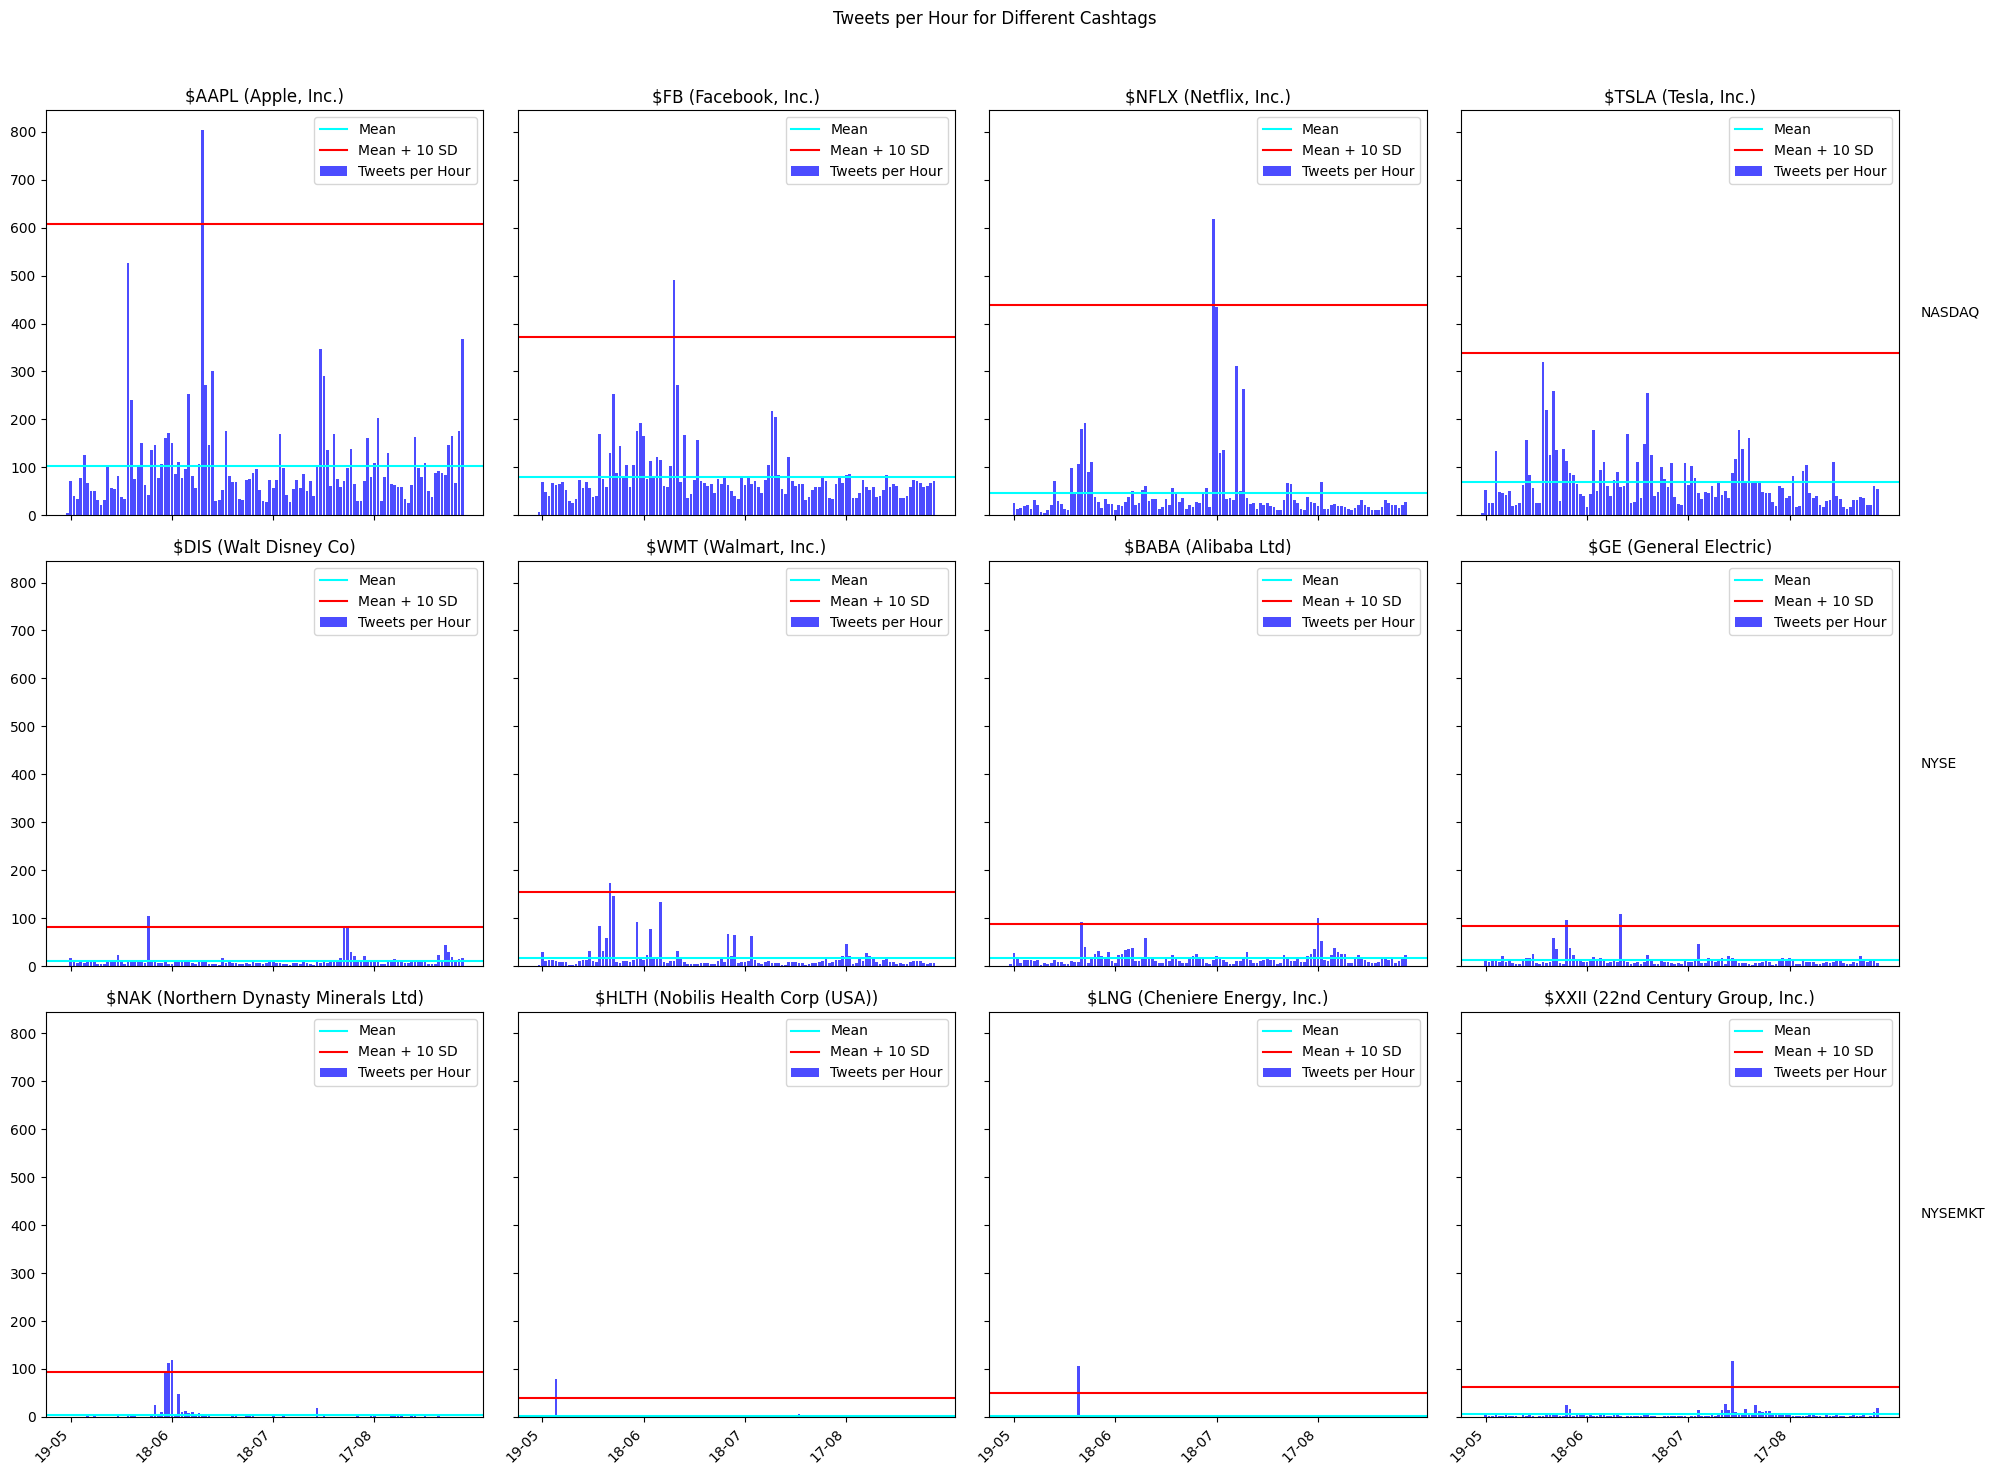

In [21]:
import matplotlib.pyplot as plt
from datetime import datetime

# Exchange names, Cashtags and plot names
cashtags = ['AAPL', 'FB', 'NFLX', 'TSLA', 'DIS', 'WMT', 'BABA', 'GE', 'NAK', 'HLTH', 'LNG', 'XXII']
exchange_names = ['NASDAQ'] * 4 + ['NYSE'] * 4 + ['NYSEMKT'] * 4
plot_names = ['$AAPL (Apple, Inc.)', '$FB (Facebook, Inc.)', '$NFLX (Netflix, Inc.)', '$TSLA (Tesla, Inc.)',
              '$DIS (Walt Disney Co)', '$WMT (Walmart, Inc.)', '$BABA (Alibaba Ltd)', '$GE (General Electric)',
              '$NAK (Northern Dynasty Minerals Ltd)', '$HLTH (Nobilis Health Corp (USA))', '$LNG (Cheniere Energy, Inc.)', '$XXII (22nd Century Group, Inc.)']

# Step 4: Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Tweets per Hour for Different Cashtags')

# Step 5: Iterate through each cashtag and draw the subplot
for i, cashtag in enumerate(cashtags):
    if cashtag in tweets_count_dict:
        ax = axes[i // 4, i % 4]

        # Initialize lists to store dates and daily means
        all_dates = []
        all_daily_means = []

        # Iterate through each date
        for date in tweets_count_dict[cashtag]:
            # Extract hours and corresponding counts for the date
            counts = list(tweets_count_dict[cashtag][date].values())

            # Calculate the total count for the day
            total_count = sum(counts)

            # Calculate the daily mean by dividing total count by 24
            daily_mean = total_count / 24

            # Append the date and corresponding daily mean to the lists
            all_dates.append(date)
            all_daily_means.append(daily_mean)

        # Convert dates to matplotlib-compatible format (if needed)
        all_dates = [np.datetime64(date) for date in all_dates]

        # Truncate x-labels to only display day and month
        tick_labels = pd.to_datetime(all_dates[::30]).strftime('%d-%m').tolist()
        ax.set_xticks(all_dates[::30])  # Display every 30th date for better readability
        ax.set_xticklabels(tick_labels, rotation=45, ha='right')

        # Plot daily means for each cashtag using bar plot
        ax.bar(all_dates, all_daily_means, label='Tweets per Hour', color='blue', alpha=0.7)

        # Calculate mean and mean + 10 standard deviations for daily means
        mean_value = np.mean(all_daily_means)
        std_dev = np.std(all_daily_means)
        upper_bound = mean_value + 5 * std_dev

        # Plot mean line (solid cyan) for daily means
        ax.axhline(mean_value, color='cyan', linestyle='solid', label='Mean')

        # Plot upper bound line (solid red) for daily means
        ax.axhline(upper_bound, color='red', linestyle='solid', label='Mean + 10 SD')

        if i % 4 == 3:
            ax.text(1.05, 0.5, f'{exchange_names[i]}', transform=ax.transAxes, fontsize=10, va='center')

        ax.set_title(plot_names[i])
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()